<a href="https://colab.research.google.com/github/thejaswin123/Task-2-Prediction-using-Unsupervised-ML/blob/main/Task_2_Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANKUR GUGLANI**
**EMAIL ID - ma20m001@smail.iitm.ac.in

**Sparks Foundation - Data Science & Analytics Internship!**
#Task_2 - Prediction using Unsupervised ML



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#**Load the iris dataset**



In [2]:
df=pd.read_csv('Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [8]:
df['Species'].nunique()

3

# *Data* *Visualization*

**Scatter plot**

SepalLengthCm vs SepalWidthCm

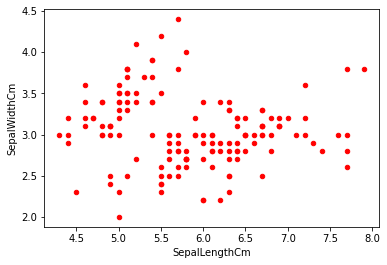

In [9]:
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm",color="red")

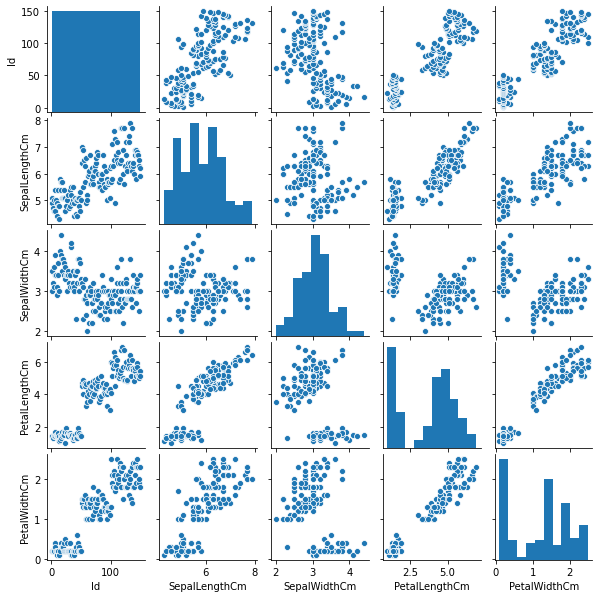

In [10]:
o=sns.pairplot(df)
o.fig.set_size_inches(8,8)

**Box plot**

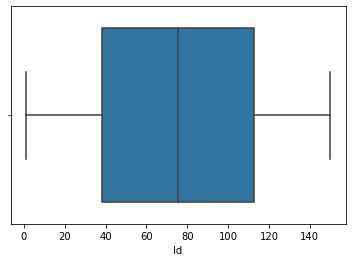

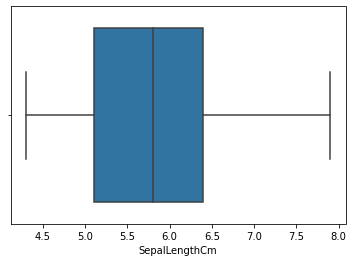

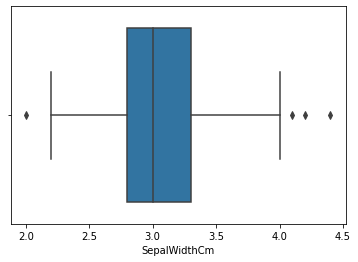

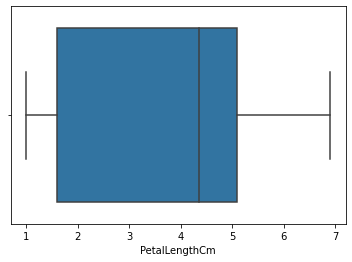

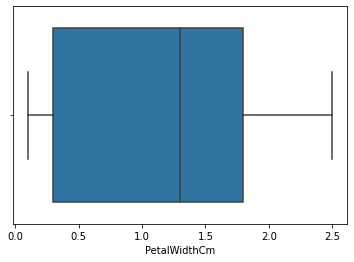

In [11]:
# checking Outliers
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

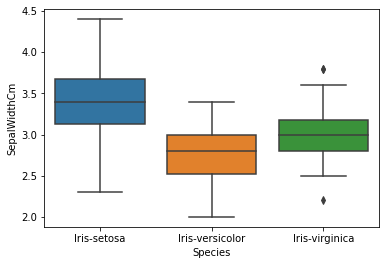

In [12]:
ax = sns.boxplot(x="Species", y="SepalWidthCm",data=df)

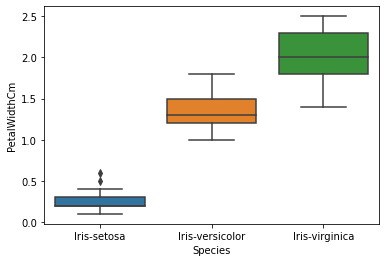

In [13]:
ax = sns.boxplot(x="Species", y="PetalWidthCm",data=df)

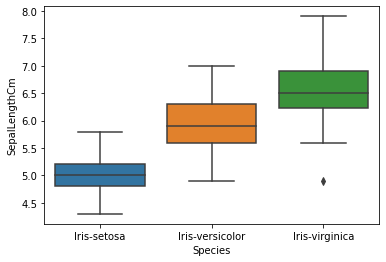

In [14]:
ax = sns.boxplot(x="Species", y="SepalLengthCm",data=df)

**Scatter plot**

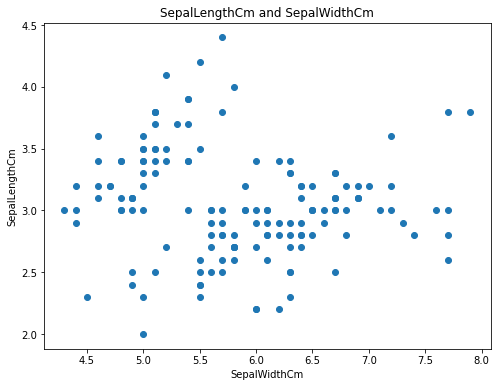

In [15]:
fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(df['SepalLengthCm'],df['SepalWidthCm'])            #Plotting the distribution of scores
plt.title('SepalLengthCm and SepalWidthCm') 
ax.set_ylabel('SepalLengthCm')
ax.set_xlabel('SepalWidthCm')
plt.show()

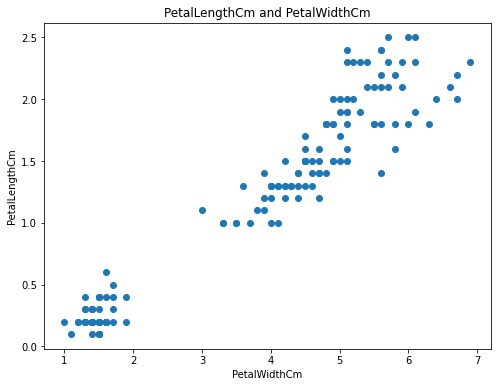

In [16]:
fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(df['PetalLengthCm'],df['PetalWidthCm'])            #Plotting the distribution of scores
plt.title('PetalLengthCm and PetalWidthCm') 
ax.set_ylabel('PetalLengthCm')
ax.set_xlabel('PetalWidthCm')
plt.show()

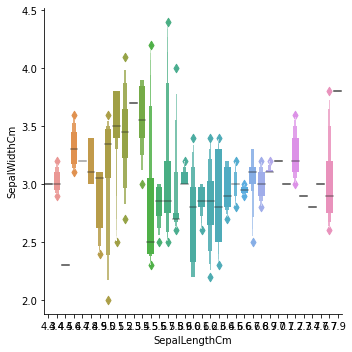

In [17]:

sns.catplot(x='SepalLengthCm',y='SepalWidthCm',data=df,kind='boxen')

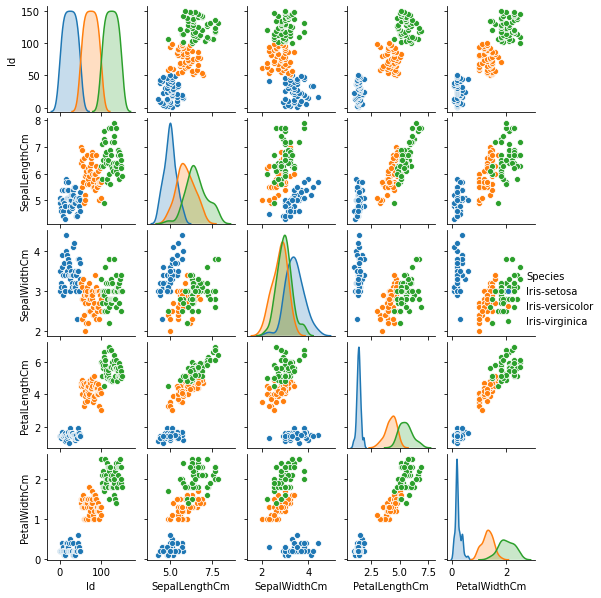

In [18]:
a=sns.pairplot(df,hue="Species")
a.fig.set_size_inches(8,8)

In [19]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


**Heatmap**

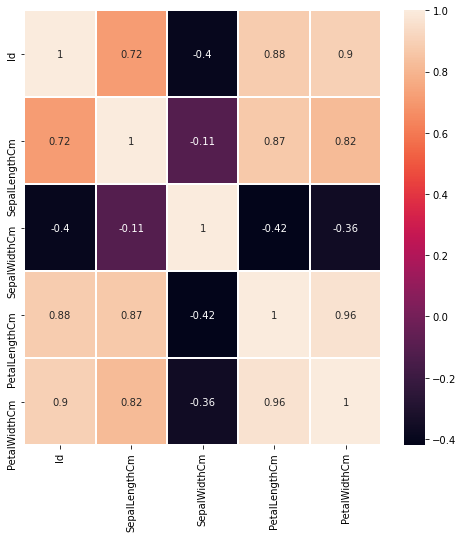

In [20]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),linewidths=1,annot=True)

**Jointplot**

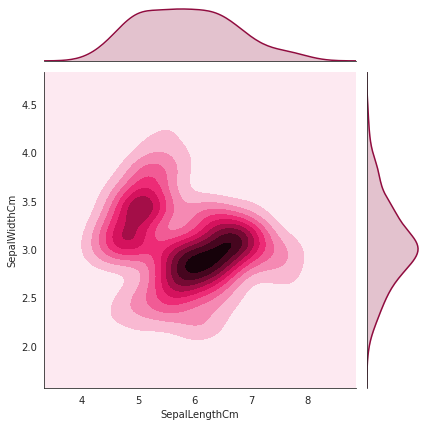

In [21]:
with sns.axes_style('white'):
    sns.jointplot("SepalLengthCm", "SepalWidthCm", df, kind='kde',color="#900C3F");


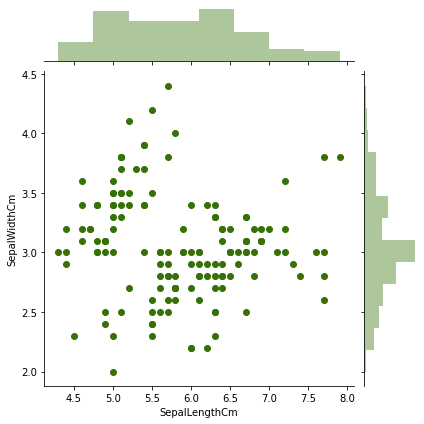

In [22]:

sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df,color="#357107")

**Statistical estimation**

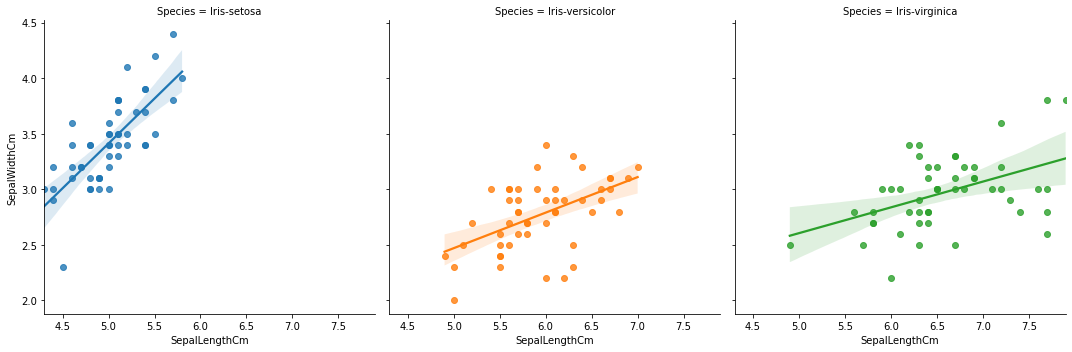

In [23]:
sns.lmplot(data=df, x="SepalLengthCm", y="SepalWidthCm", col="Species", hue="Species")

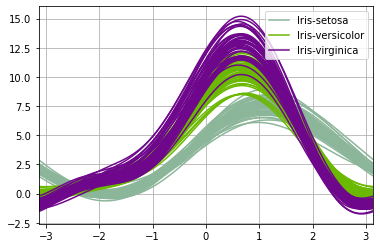

In [24]:
df1=df
from pandas.plotting import andrews_curves
andrews_curves(df1.drop("Id", axis=1), "Species")

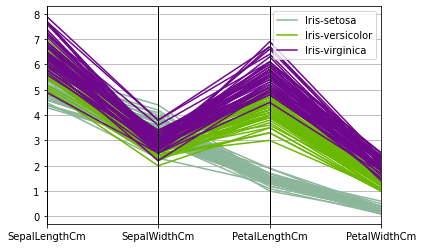

In [25]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df1.drop("Id", axis=1), "Species")

# **Elbow Method using within-cluster-sum-of-squares(wcss)**

In [26]:
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss    

[281831.54466666654,
 70581.3808,
 31320.711199999994,
 17762.657226173542,
 11423.238080088988,
 7909.5306730769225,
 5881.448116883118,
 4562.780079365082,
 3579.7205612745106,
 2968.4914326653743]

# **Elbow graph to find optimum no. of Clusters**

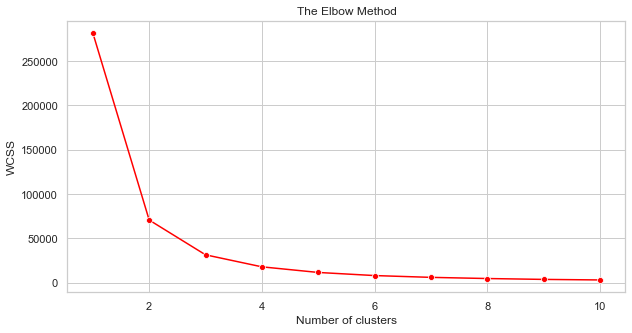

In [27]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Initialization and fitting using K-means++**

In [28]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# **Visualizing the Clusters**

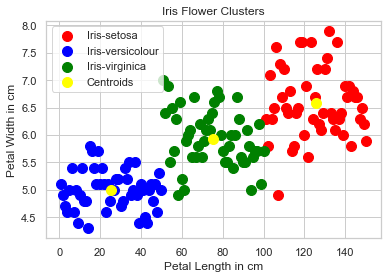

In [29]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()

# **TASk 2 COMPLETED**

---

